<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_9_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 5- Calibration plot: Like task 3 but using alpha=0.0001 throughout and k-fold k=10 cross-validation on 100 brain regions to produce a calibration plot (requires predict_proba() function, implemented in sklearn) for the four activation functions. Compare these calibration curves to that of LogisticRegression (default parameters) but also plotting its
calibration curve based on the same cross-validation scheme

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We import the data first in order to select the last 10 subjects
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=(100))
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(100)) # We fix this at 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

In [ ]:
# We prepare the X matrix and y vector, and we scale X
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)

In [ ]:
%%capture
# We create MLPRegressor models with their corresponding activation functions, as well as a Logistic Regression model
mlp1 = MLPClassifier(activation="identity")
mlp2 = MLPClassifier(activation="logistic")
mlp3 = MLPClassifier(activation="tanh")
mlp4 = MLPClassifier(activation="relu")
logreg  = LogisticRegression()

# We define the parameters attribute with single values, as we want to keep them fixed
parameters = {'max_iter':[1000],'random_state':[42],'alpha':[0.0001]}

# We prepare the Grid Search estimators for all models with 10-fold cross-validation
clf1 = GridSearchCV(mlp1,parameters,cv=10,return_train_score=True)
clf2 = GridSearchCV(mlp2,parameters,cv=10,return_train_score=True)
clf3 = GridSearchCV(mlp3,parameters,cv=10,return_train_score=True)
clf4 = GridSearchCV(mlp4,parameters,cv=10,return_train_score=True)
LR = GridSearchCV(mlp4,parameters,cv=10,return_train_score=True)

# We fit the estimator to our data
clf1.fit(X_scaled, y)
clf2.fit(X_scaled, y)
clf3.fit(X_scaled, y)
clf4.fit(X_scaled, y)
LR.fit(X_scaled,y)

# We retrieve the probability predictions so that we can use them later to calculate the calibration plots
y_prob_id = clf1.predict_proba(X_scaled)
y_prob_log = clf2.predict_proba(X_scaled)
y_prob_tanh = clf3.predict_proba(X_scaled)
y_prob_relu = clf4.predict_proba(X_scaled)
y_prob_LR = LR.predict_proba(X_scaled)

In [ ]:
# We compute the calibration curve for each model
prob_true_id, prob_pred_id = calibration_curve(y, y_prob_id[:,1])
prob_true_log, prob_pred_log = calibration_curve(y, y_prob_log[:,1])
prob_true_tanh, prob_pred_tanh = calibration_curve(y, y_prob_tanh[:,1])
prob_true_relu, prob_pred_relu = calibration_curve(y, y_prob_relu[:,1])
prob_true_LR, prob_pred_LR = calibration_curve(y, y_prob_LR[:,1])

[Text(0.5, 1.0, 'CALIBRATION PLOT 1: MLP with activation function = identity')]

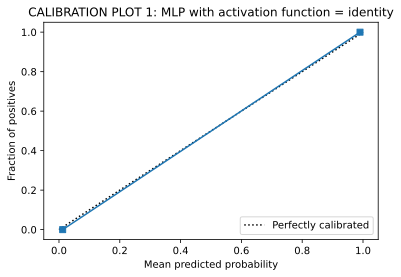

In [ ]:
# Let's plot!
disp1 = CalibrationDisplay(prob_true_id, prob_pred_id, y_prob_id)
disp1.plot()
plt.gca().set(
    title="CALIBRATION PLOT 1: MLP with activation function = identity")

[Text(0.5, 1.0, 'CALIBRATION PLOT 2: MLP with activation function = logistic')]

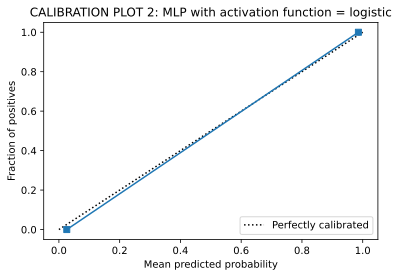

In [ ]:
disp2 = CalibrationDisplay(prob_true_log, prob_pred_log, y_prob_log)
disp2.plot()
plt.gca().set(
    title="CALIBRATION PLOT 2: MLP with activation function = logistic")

[Text(0.5, 1.0, 'CALIBRATION PLOT 3: MLP with activation function = tanh')]

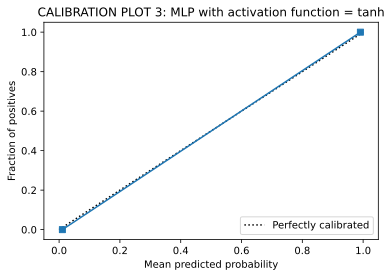

In [ ]:
disp3 = CalibrationDisplay(prob_true_tanh, prob_pred_tanh, y_prob_tanh)
disp3.plot()
plt.gca().set(
    title="CALIBRATION PLOT 3: MLP with activation function = tanh")

[Text(0.5, 1.0, 'CALIBRATION PLOT 4: MLP with activation function = ReLU')]

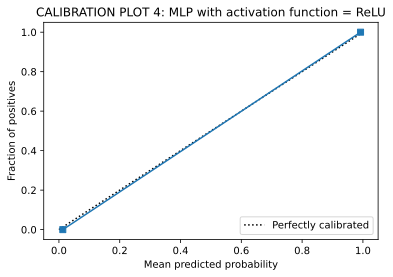

In [ ]:
disp4 = CalibrationDisplay(prob_true_relu, prob_pred_relu, y_prob_relu)
disp4.plot()
plt.gca().set(
    title="CALIBRATION PLOT 4: MLP with activation function = ReLU")

[Text(0.5, 1.0, 'CALIBRATION PLOT 5: Logistic Regression')]

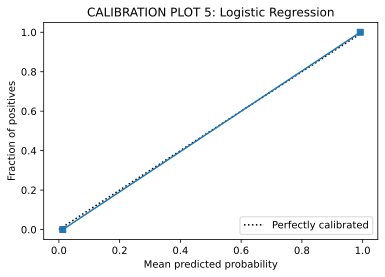

In [ ]:
disp5 = CalibrationDisplay(prob_true_LR, prob_pred_LR, y_prob_LR)
disp5.plot()
plt.gca().set(
    title="CALIBRATION PLOT 5: Logistic Regression")

Overall, all 5 models are remarkably well calibrated.